In [1]:
from tensorflow import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pylab as plt
import numpy as np
from google.colab import drive
import os
from keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if os.path.exists('/content/gdrive/')==False:
  drive.mount('/content/gdrive')
  print('Google drive is mounted\n')
else:
  print('Google drive is already mounted\n')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google drive is mounted



In [8]:
# 사용자한테 입력 받는 부분

image_name = input("사진 이름을 적어주세요 :  ")
feeling = input("# 문구를 입력주세요 : ")


사진 이름을 적어주세요 :  Img_052_0992.JPG
# 문구를 입력주세요 : #무더위 #지친다 #고기 #입가심 


- 예측한 이미지로부터의 라벨을 받기 위해서 작성
- 파일의 경로를 따라 바로 클래스명과 이미지로 딕션을 만들어주는 편리함때문에 이미지 데이터는 불필요하지만 그대로 사용함

Found 56993 images belonging to 58 classes.


W0623 17:27:17.145646 140445947279232 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


애호박볶음


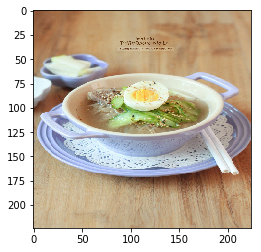

In [9]:
val_datagen = ImageDataGenerator(rescale=1/255)

val_path = '/content/gdrive/My Drive/food_full/'    #수정해야할 부분 ~ 라벨링 부분
val_dir = str(val_path)

image_size = 224

val_batchsize = 10


validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(image_size,image_size),
                                                    batch_size=val_batchsize,
                                                    shuffle=True)

#학습된 모델 로드
model2 = keras.models.load_model('/content/gdrive/My Drive/densenet2.h5')

#분류할 이미지의 경로
image_path = '/content/gdrive/My Drive/'
image = image_path + image_name    #입력할 이미지 경로


#이미지를 모델이 예측 가능하도록 가공
x = keras.preprocessing.image.load_img(image, target_size=(224,224))
x1 = keras.preprocessing.image.img_to_array(x)
x = np.expand_dims(x1, axis=0)
#예측
result = model2.predict(x)

#목록 클래스 라벨화 후 정렬
label_names = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

#결과값을 음식으로 맵핑시켜 초기화
result_label = label_names[np.argmax(result)]

print(result_label)

result_img = keras.preprocessing.image.array_to_img(x1)

plt.imshow(result_img)

In [11]:
import pip
%pip install -U git+https://github.com/sloria/TextBlob.git@dev
  
!pip install --user -U nltk
from textblob.classifiers import NaiveBayesClassifier



train = [
    ('#먹스타그램 #친스타그램 #얼스타그램 #셀스타그램 #먹스타그램 #셀카 #셀피 #일상 #맛집 #아이폰 #카페 #오늘 #첫줄 #데일리 #이태원 #홍대 #좋아요반사 #동성로 #강남 #압구정 #가로수길 #좋아요 #팔로우 #선팔 #맞팔 #소통 #인친 #선팔하면맞팔 #맞팔해요 #선팔맞팔', '좋음'),
    ('#팔로워 #홍대맛집추천 #팔로우 #홍대가오곱창 #먹스타그램 #치즈곱창 #홍대맛집베스트10 #홍대곱창 #맛스타그램 #홍대술집 #홍대무한리필 #홍대맛집', '좋음'),
    ('#소통해요 #데이트 #아침 #금요일 #셀카 #맞팔 #선팔 #소통 #데일리 #홍대 #서면 #얼스타그램 #팔로우 #한남동 #선팔하면맞팔 #맞팔해요 #셀피 #인스타 #좋아요 #좋아요반사 #일상스타그램 #사진 #사진스타그램 #데일리그램 #먹스타그램 #술스타그램','좋음'),
    ('#대구 #삼덕동카페 #동성로카페 #교동카페 #아이폰x #일상 #daily #셀카 #셀피 #셀스타그램 #얼스타그램 #selca #selfie #맛스타그램 #먹스타그램 #데일리룩 #대구옷가게 #동성로옷가게 #봉산동옷가게 #제이러빗 #팔로우 #맞팔 #좋아요 #fff #lll #follow #ootd #dailylook','좋음'),
    ('#셀카 #인스타그램 #얼굴 #먹스타그램 #먹방 #먹다 #먹스타그램 #먹방 #방송 #bangsong #일상 #데일리룩 #일상 #데일리룩 #개스타그램 #냥스타그램 #개스타그램 #냥스타그램 #커플스타그램 #korea','좋음'),
    ('#강릉 #시장 #중앙시장 #강릉크로와상다이야끼 #강릉크로와상붕어빵 #시장투어 #강릉시장투어 #간식 #후식 #야식 #야시장 #붕어빵 #강릉중앙시장 #맛스타그램 #먹스타그램 #간식스타그램 #후식스타그램 #야식스타그램 #붕어빵그램 #붕어빵스타그램','좋음'),
    ('#첫줄 #셀스타그램 #얼스타그램 #인스타굿 #셀카 #셀피 #좋아요반사 #맞팔 #선팔하면맞팔 #선팔 #팔로우 #팔로우미 #인스타데일리 #인친 #소통 #데일리 #오오티디 #동성로 #강남 #해운대 #다이렉트 #인친환영 #좋반 #fff #instagood #instadaily #selfie #먹방 #likeforfollow #follow','좋음'),
    ('#마카롱스타그램 #마카롱 #셀스타그램 #사랑둥이 #행복 #좋반테러 #01 #02 #선팔 #맞팔 #선팔하면맞팔 #팔로잉 #팔로미 #인스타그램 #소통 #학생 #소통해요 #좋아요반사 #좋반 #fff #f4f #follow #f4follow #like4me #like4likes #likeforlikes #instagram #like #like4follow #following','좋음'),
    ('#selfie #selca #selfies #followme #좋아요 #좋아요반사 #좋반 #팔로우 #팔로워 #팔로잉 #팔로우미 #팔로워늘리기 #likeforlikes #likeforfollow #follow #선팔 #선팔하면맞팔 #선팔맞팔 #맞팔 #맞팔해요 #맞팔환영 #소통 #like4likes #ootd #liker #likers #강남 #잠실 #청담동','좋음'),
    
    ('#휴가철 #7월여행 #제주도여행 #선글라스추천 #휴양지추천 #선크림추천 #가족여행 #힐링여행 #호텔수영장 #호텔추천 #해외여행추천','좋음'),
    ('#여수 #여수삼합 #여수삼합맛집 #딱새우 #여수포차거리 #여행 #힐링 #여행스타그램 #맛스타그램 #JMT #힐링여행 #맛집 #좋아요 #오오티디 #데일리 #일상','좋음'),
    ('#제주도여행 #이호테우해변 #여행 #여행기록 #여행스타그램 #힐링여행 #행복해 #소확행 #소확행_작지만_확실한_행복','좋음'),
    ('#삼교리동치미막국수태장점 #삼교리동치미막국수 #동치미막국수 #원주맛집 #강원도맛집 #원주여행 #강원도여행 #주말여행 #힐링여행 #막국수맛집 #태장동맛집 #메밀전 #수육 #육개장 #메밀만두 #동치미 #막국수 #태장맛집 #맛스타그램 #먹스타그램 #먹방 #강원도 #원주 #원주가볼만한곳 #원주맘 #원주맛집추천 #원주데이트','좋음'),
    ('#190621 #제주도 #jeju #제주여행 #여행 #힐링 #힐링여행 #일상 #daily #소심한책방 #마그넷덕후 #풍경 #사진 #picture #친구랑 #👭🏻 #instagram','좋음'),
    ('#데일리메이크업 #여행 #여행스타그램 #여행스냅 #여행준비 #여행기록 #여행일기 #여행중독 #가족여행 #혼여 #힐링여행 #여행지추천 #한국여행 #일본여행','좋음'),
    ('#주말여행 #힐링여행 #막국수맛집 #태장동맛집 #메밀전 #수육 #육개장 #메밀만두 #동치미 #막국수 #태장맛집 #맛스타그램 #먹스타그램 #먹방 #강원도 #원주 #원주가볼만한곳 #원주맘 #원주맛집추천 #원주데이트','좋음'),
    ('#제주도여행 #월정리해변 #종달리마을산책 #소심한책방 #카페제주동네 #크랩잭 #야경 #갑작스러운여행 #힐링여행','좋음'),
    ('#몰디브두짓타니 #몰디브 #신혼여행 #신혼부부 #우리결혼했어요 #우결 #힐링여행#24시간부족한몰디브#프라이빗스파 #수영하고밥먹고수영하고 #생얼이다그램 #모히또에서몰디브한잔','좋음'),
    ('#여행 #해외여행 #여행에미치다 #여행사진 #여행중독 #여행그램 #여행스타그램 #자유여행 #힐링여행 #혼자여행','좋음'),
    
    ('#일상스타그램 #술스타 #먹스타그램 #에어팟 #기부니가좋다 #loveislove #밤 #힐링 #친스타그램 #우정스타그램 #주말 #신난다🎶 #하루 #여유 #육아맘 #자유부인 #신난다 #감성 #찍스타그램 #맘스타그램 #줌마스타그램 #젊줌마 #육아스타그램 #아들스타그램 #육아소통 #아들맘 #좋아요 #맞팔 #소통 #팔로우','좋음'),
    ('#주말 #스타벅스 #아이폰 #호에부 #소통해요 #데이트 #아침 #일요일 #오오티디 #아이폰 #셀카 #맞팔 #선팔 #오늘 #소통 #데일리 #홍대 #얼스타그램 #셀스타그램 #맛스타그램 #먹스타그램 #인스타그램 #팔로우 #소통 #소통해요 #선팔 #선팔하면맞팔 #맞팔 #맞팔해요 #셀피 #인스타 #좋아요 #일상 #일상스타그램 #일상 #사진"','좋음'),
    ('#대구 #포항 #바다 #파도소리 #감성 #새벽 #먹스타그램 #오뎅탕 #닭꼬치 #버억 #캠핑 #초보 #삶 #자연인 #에어텐트 #주말 #불토 #존잼 #수다','좋음'),
    ('#셀스타그램 #데이트 #맛집 #f #ootd #주말 #일상 #오오티디 #커피 #소통 #선팔하면맞팔 #daily #good #travel #먹스타그램 #맛스타그램 #cafe #coffee #cake #dessert #좋아요 #맞팔 #선팔 #팔로우 #fff #food #today #love #여행','좋음'),
    ('#병점맛집 #쉐이크포테이토 #에그인헬 #신기방기 #신기한맛 #먹스타그램 #고기스타그램 #친구스타그램 #소통스타그램 #맞팔선팔 #인친스타그램 #소통스타그램 #데일리 #인스타 #주말 #불토 #선팔스타그램 #팔로우미 #팔로우늘리기 #팔로우반사 #인스타푸드 #인스타일상','좋음'),
    ('#짜파구리 #맥주 #연어초밥 #젤리 #감자칩 #행복조화 #편의점사랑 #주말 #개꿀 #힐링 #감정 #기록','좋음'),
    ('#vlog #인싸 #꿀주말 #노원핫플 #노원 #노원역 #핫플 #클럽 #감주 #더썸 #파티 #청포 #노원청춘포차 #클러버 #노원더썸 #음악 #클럽스타그램 #클럽파티 #edm #패피 #인스타 #노원클럽더썸 #여대 #dj #대학교 #클럽더썸 #일상 #소통 #좋아요','좋음'),
    ('#데일리#일상#소통#맞팔#선팔#팔로우#셀피#셀스타그램#인싸#데일리룩#오오티디#맞팔환영#selfie #selca #대구 #우동 #토스트 #역시굿 #좋아요 #맛있어 #토욜마지막','좋음'),
    ('#생일파티 #hbd #피팅모델 #훈남 #selfie #인싸 #ootd #상수맛집 #피로연대관 #생일대관 #파티룸 #분위기깡패 #브라이덜샤워 #와인 #홍대와인 #홍대맛집 #데일리룩 #상수와인바 #홍대와인바 #생일파티룸','좋음'),
    ('#럽스타그램 #럽 #사랑꾼 #커플스타그램 #연인스타그램 #꽁냥꽁냥 #럽럽 #연애중 #행복 #사랑 #여수 #광주 #셀스타그램 #얼스타그램 #데일리 #데일리룩 #거울샷 #팔로우 #맞팔 #선팔 #다이렉트 #선팔맞팔 #selfie #selca #daily #follow','좋음'),
    
    ('#저녁메뉴 #신혼데이트 #꽁냥꽁냥 #자랑그램','좋음'),
    ('#럽스타그램 #커플 #커플사진 #럽스타 #꽁냥꽁냥 #커플스타그램 #남자친구 #좋아요반사 #사랑그램 #사랑가득 #lovestagram #couple #럽럽 #리얼러브 #love #연애 #커플룩#사랑해 #더럽 #theluv #연애의온도 #커플그램#오늘의코디 #ootd #셀스타그램','좋음'),
    ('#비엣남 #나쨩비치 #조식먹고 #준비해서 #사진찍으러 #5분찍고 #땀이줄줄 #선크림도안바르고 #살이타들어감 #30분만에 #후딱찍고 #호텔로복귀 #땀에쩔은 #몸뚱아리 #사람구이될뻔 #아휴 #꿀신혼 #럽스타 #꽁냥꽁냥 #사진찍기힘들어 #잘나온건지모르겠다','좋음'),
    ('#커플스타그램 #럽스타그램 #꽁냥꽁냥 #연애일기 #커플일상 #곰신스타그램 #곰신맞팔 #곰신소통 #담백한브랜딩 #일병곰신 #동갑내기커플 #지상커플 #커플감성 #지은상현 #찐쿤스튜디오 #이미지사진 #일병곰신','좋음'),
    ('#셀카 #셀카그램 #창문샷 #주말커플 #주말데이트 #장거리연애중 #럽스타그램 ','좋음'),
    ('#단짝 #쏘울메이트 #반쪽 #개구쟁이 #내사랑 #러브샷 #꽁냥꽁냥 #달짝지근 #행복 #설렘 #심쿵 #커플 #짬데이트 #24시간이 #모자라 #사랑해','좋음'),
    ('#부부셀카 #데이트그램 #똑단발 #단발머리 #핫플레이스 #핫플 #이태원 #디저트그램 #데이트 #국제부부 #국제가족 #셀스타그램 #데일리 #커플스타그램 #꽁냥꽁냥 #패션5','좋음'),
    ('#광주 #대전 #장거리연애 #남친스타그램 #여친스타그램 #사랑꾼 #커플스타그램#연인스타그램 #커플 #커플스타그램 #알콩달콩 #꽁냥꽁냥 #럽럽 #사랑꾼 #연애중 #행복 #사랑 #데이트 #데이트코스#데이트스타그램#Love#couple#좋반 #선팔하면맞팔가요','좋음'),
    ('#부부스타그램 #부산맛집 #럽스타그램 #우리부부 #셀기꾼 #패피 #셀피 #사랑해 #소통 #데일리 #좋아요반사 #팔로우 #점심 #저녁 #해운대 #광안리 #화명동맛집 #꽁냥꽁냥 #럽럽 #감성여행 #주말여행 #맛스타그램 #인스타그램 #인친환영 #좋아요 #멋스타그램 #경주여행','좋음'),
    ('#치즈 #new커플 #부부 #커플vs부부 #꽁냥꽁냥 #솔로탈출 #축하 #우린 #5년째열애중 #이면좋겠다 #현실부부','좋음'),
    
    
    ('#건대 #불금 #술 #스트레스 #날려버리기 #소확행 #이라고는 #할수없지 #? #밤샘 #포차끝판왕 #삼거리포차 #오렌지룸 #노래방 #수다포차 #또노래방 #노는게젤조아 #뽀로로 #행복 #친구야 #그래도 #우정해 #사랑해 #놀고싶다 #또 #놀아줘 #아침 #귀가','좋음'),
    ('#웃기장인 #일상 #맥주 #버드와이저 #생선까스 #졸맛탱 #소소한일상 #소확행 #개꿀 #언제자냐 #내일도대박치자 #굿밤','좋음'),
    ('#일상그램 #줌마그램 #오늘그램 #초딩맘 #토요일 #불토 #주말 #세로본능 #술스타그램 #영대술집 #영대 #얼큰오뎅탕 #미숫가루소주 #건배샷 #소소한이야기 #데일리 #소확행 #소통 #선팔 #맞팔 #좋아요','좋음'),
    ('#김밥 #영화다시보기 #오늘의영화 #쉬는날 #주말 #오늘뭐하지 #오늘뭐해 #오늘도김밥 #김밥만들기 #홈쿡 #해시태크 #소확행','좋음'),
    ('#담양 #여행 #여행중 #여행스타스램 #커플룩 #산외마을 #소고기 #투움바파스타 #감바스 #스냅사진 #여행사진 #사랑꾼 #럽스타그램 #럽스타그램 #연애 #사랑해 #남친 #남자친구 #커플 #데이트 #행복 #소확행 #힐링 #놀자','좋음'),
    ('#불날개들고한컷 #예쁜이들사이에🦑 #돼지파티 #우리들맛집1호 #수다쟁이들 #자몽빙수 #JMT #먹스타그램 #Daily #소확행','좋음'),
    ('#맥주 #혼맥 #혼술 #세계맥주 #맥주맛도모르면서 #소확행 #모락산현대아파트상가편의점 #사장님은척척박사','좋음'),
    ('#먹스타그램 #맛스타그램 #음식스타그램 #먹방스타그램 #푸드스타그램 #인스타푸드 #먹방그램 #먹부림 #음식 #야식 #소확행 #소중 #일상 #일상스타','좋음'),
    ('#불토 #소확행 #자유 #술스타그램 #야식 #꼬치 #먹스타그램 #맥주','좋음'),
    
    ('#팥빙수 #국산팥빙수 #옛날빙수 #오리지날빙수 #빙수 #빙수야 #가정식빙수 #1일1빙수시대 #빙수떡 #소확행 #빙수연유 #빙수과일 #빙수아이스크림 #빙수시럽 #빙수우유#빙수쿠키 #곰젤리빙수 #오늘빙수','좋음'),
    ('#온몸이 #찌푸둥 #사우나 #찜질방 #가고싶다 #♨#피곤 #고단하다 #ㅠㅠ #힘내자 #무적 #화이팅', '피곤'),
    ('#시험 #시험기간 #시험공부 #셀스타 #선팔하면맞팔가요 #맞팔 #맞팔환영 #피곤 #중3 #04 #16 #04년생', '피곤'),
    ('#피곤 #일상 #데일리 #daily #셀카 #셀스타그램 #selca #selfie #셀 #휴식 #여가 #여유 #스트레스 #힐링', '피곤'),
    ('#도서관은만석 #날씨는흐림 #내마음도흐림 #피곤 #짜증', '피곤'),
    ('#토요일 #주말 #불토 #치킨 #새벽 #부천 #피곤 #졸려 #컨디션 #제로 #별로 #기분 #나쁨', '피곤'),
    ('#바쁜하루 #밤10시 #늦은 #저녁식사 #하루의마무리 #자정넘은 #심야영화 #피곤', '피곤'),
    ('#산책 #운동 #반려견 #새벽 #피곤 #개피곤 #배고파', '피곤'),
    ('#피곤 #피로 #인생 #퉤', '피곤'),
    ('#불토 #먹스타 #먹스타그램 #맛스타 #맛스타그램 #대구 #대구맛집 #맛집 #먹방 #일상 #소통 #좋아요 #happy #직장인 #직딩 #맞팔 #daily #퇴근 #피곤', '피곤'),
    
    ('#기분전환 #피곤 #피곤해 #주말바쁨', '피곤'),
    ('#휴가 #술 #피곤 #새벽 #불토 #친구 #맞팔 #팔로우', '피곤'),
    ('#일상 #토요일 #피곤 #살려줘 #쉬고싶다', '피곤'),
    ('#피곤 #먹고씻냐 #씻고먹냐 #아증말 #퇴근스타그램 #치맥 #달려달려', '피곤'),
    ('#피곤#스트레스#공부#시험#기말#중학생#중2#기분#짜증나', '피곤'),
    ('#공스타 #공스타그램 #공부 #머리터질것같아 #기말고사 #9일 #만점 #올백 #반에서1등 #전교1등 #하고싶다 #기적을만들어보자 #영재반 #도서관 #피곤 #내일은없다', '피곤'),
    ('#피곤 #자자 #요키사랑 #멍뭉이', '피곤'),
    ('#피곤 #둥 #멍스타 #개 #강아지 #푸들 #dog #cute', '피곤'),
    ('#불토 #토요일 #친구 #열일 #미용 #패션 #내일도 #출근 #피곤 #데일리 #술 #맥주 #쏘맵#1차 #2차 #귀요미', '피곤'),
    
    ('#티익스프레스 #렛츠트위스트 #바이킹 #아마존익스프레스 #롤링엑스트레인 #당일치기여행 #피곤 #피곤피곤', '피곤'),
    ('#학원 #공부 #피곤', '피곤'),
    ('#덕이 #덕블리 #덕이의하루하루 #푸들 #무료 #조아요 #좋아요 #이쁨 #이쁘니 #귀욤 #뿜뿜 #개스타그램 #멍스타그램 #피곤 #꿈뻑꿈뻑', '피곤'),
    ('#인생 #힘들다 #이겨내자', '피곤'),
    ('#인간관계 #포기 #지친다 #힘들다 #이제 #끝 #스트레스 #감정 #03년생 #고1 #좋반댓 #맞팔선팔', '피곤'),
    ('#힘들다#모르겠다#멘붕#새벽감성#새벽스타그램#얼스타그램#셀카#조아요', '피곤'),
    ('#일상 #일상스타그램 #밤 #밤하늘 #하늘사진 #세벽 #세벽감성 #기분 #생각정리 #감성사진 #잠이안와 #힘들다 #굿밤 #정신차려 #life #lifestyle #daily #dailylook', '피곤'),
    ('#시험 #D-10 #공부 #힘들다 #꿈 #불안 #무서움 #기쁨 #슬픔 #마음', '피곤'),
    ('#지침 #셀프백일상 #힘들다 #셀프고생', '피곤'),
    ('#산책 #마실 #감성 #비밀공간 #나만알고싶은곳 #무료함 #무기력 #활력소 #공허함 #스트레스 #데일리 #일상 #소통 #좋아요', '피곤'),
    
    ('#정신줄놓음 #고1 #망해따#무기력 #감정기복최고#답이없다 #좋아요 #좋반 #03 #짜증이빠이', '피곤'),
    ('#무의미 #의미 #행복 #무기력 #연습 #레슨 #기타 #베이스 #수면부족', '피곤'),
    ('#죽음 #자살 #삶 #의미 #무기력 #이유 #모든것 #바다 #끝', '피곤'),
    ('#무기력 #스트레스 #고민 #고심 #걱정 #일상 #그만하고싶다 #망할것', '피곤'),
    ('#고통 #힘듬 #괴로움 #아픔 #무기력 #자괴감 #영어글귀 #영어글', '피곤'),
    ('#나들이 #드라이브 #한강 #주말 #휴식 #행복', '피곤'),
    ('#날씨 #노미세먼지 #구름 #일상 #여름 #휴가 #휴식', '피곤'),
    ('#오늘 #휴식 #기쁨 #잠 #보약 #힐링 #꿈사마', '피곤'),
    ('#좋아요 #건대 #홍대 #홍대카페 #오늘 #스타벅스 #커피 #휴식 #수다 #여유 #친구 #셀피 #셀카 #일상 #사진 #데일리 #인스타 #먹스타 #맛스타 #전신샷 #먹방 #연남동 #맛집 #빵 #와인 #술스타그램 #브런치 #샐러드 #브런치맛집', '피곤'),
    ('#음악추천 #노래추천 #노래 #노래스타그램 #선팔 #맞팔 #힐링 #휴식 #소통 #좋아요 #감성', '피곤'),
   
    ('#술 #슬한잔 #주말 #토요일 #일요일 #새벽 #새벽술 #감성 #감성충만 #감성풍만 #술땡기네#술땡기는날 #주말출근 #휴식', '피곤'),
    ('#샐러드 #브런치 #술스타그램 #와인 #빵 #맛집 #연남동 #먹방 #전신샷 #맛스타 #먹스타 #인스타 #데일리 #사진 #일상 #셀피 #셀카 #친구 #수다 #여유 #휴식 #스타벅스 #커피 #오늘 #홍대 #강남 #건대 #좋아요 #거울샷 #금요일 #전신샷', '피곤'),   
    ('#시루가루 #믹스견 #똥개 #자매 #멍스타그램 #견스타그램 #개스타그램 #애기강아지 #아기강아지 #새끼강아지 #반려견 #강아지 #펫팸족 #댕댕이 #좋아요 #잠 #졸림 #개졸림', '피곤'),
    ('#졸림 #멍스타그램', '피곤'),
    ('#백곰 #잠 #폼피츠 #댕댕이 #멍멍이 #강아지 #발바닥 #졸림 #새벽 #밤', '피곤'),
    ('#믿음이 #졸림 #무거운눈꺼풀 #밤 #잠못드는밤 #포메라니안 #댕댕이그램', '피곤'),
    ('#데이트 #피곤 #영화스타그램 #맞팔 #소통 #공감 #선팔 #일상 #주말 #토요일 #데일리 #졸림 #피로누적 #자자', '피곤'),
    ('#낮잠 #졸림 #할말없음', '피곤'),
    ('#귀찮 #피곤 #졸림 #두통 #인생', '피곤'),

    ('#시험기간 #공부 #자고싶다 #8', '피곤'),
    ('#불면증 #아픔 #직업병 #자고싶다 #피곤해', '피곤'),
    ('#잘준비 #나도 #자고싶다', '피곤'),
    ('#오만가지생각 #오만가지감정 #긁적긁적 #육아는우울해 #육아는노동 #육아는힘들다 #육아는연중무휴 #요즘너무힘들다 #피곤해 #자고싶다 #혼자있고싶다 #육아는체력 #육아는답이없다 #체력이따라주지가않아 #내몸이두개였음좋겠다 #육아공감 #세종맘 #남매맘 #육아맘 #육아소통 #좋아요 #daily #일상', '피곤'),
    ('#끝없는작업 #아무생각없이 #자고싶다 #내일도바쁘겠지 #룰루랄라', '피곤'),
    ('#그냥피곤 #잘래 #공부재미없어 #자고싶다’', '피곤'),
    ('#물놀이 #힘들다 #자고싶다 #잠이온다 #졸려 #잠듬 #두손공손히 #ㅋㅋㅋ #옥정신도시 #이편한세상 #물놀이장', '피곤'),
    


    ('#고1공스타 #겅부 #공부 #학생 #밤새기 #무진장 #피곤 #눈감김 #9H #한것도 #없는데 #기가 #짲응 #잘래 #미치는공부 #즐거운공부', '피곤'),
    ('#푸숑 #푸들 #강아지 #개잠 #개숙면 #눈감김', '피곤'),
    ('#배부름 #눈감김 #피곤한디 #계속흡입 #고기고기 #핵피곤', '피곤'),
    ('#야식 #배고파 #저녁도못먹고 #졸리고 #먹스타그램 #먹고잘까 #누가차려주세요 #눈감김 #나의일상그램 #쫄면먹고파', '피곤'),
    ('#몸은_넝마 #피곤 #두통 #눈감김 #멍 #짐', '피곤'),
    ('#개졸음 #개졸림 #눈감김 #낮잠', '피곤'),
    ('#고양이 #냥스타그램 #졸림 #눈감김 #졸려', '피곤'),

    ('#눈가주름 #다크써클', '피곤'),
    ('#일개미 #하루종일일만했네 #일쟁이 #아직안끝나따 #유튜브시작 #유튜브편집자 #신입유튜버 #수의테크니션 #다크써클 #일상 #셀피', '피곤'),
    ('#결국음료한잔 #그대로 #다시 #테이크아웃 #점점 #다크써클 #심해지는 #39개월', '피곤'),
    ('#주말 #헬육아 #초보엄마 #다크써클 #초췌함', '피곤'),
    ('#투잡 #피곤 #자고싶다 #다크써클 #일상 #데일리', '피곤'),
    ('#직장맘 #다크써클 #집에가자 #퇴근기다림', '피곤'),
    ('#눈풀림 #다크써클', '피곤'),

    ('#무거운눈 #졸리다졸려', '피곤'),
    ('#무거운눈 #안잔척', '피곤'),
    ('#잠이솔솔 #무거운눈꺼풀 #졸려요 #눈이감겨 #안돼 #자면안돼', '피곤'),
    ('#졸리다 #감긴다 #꾸벅꾸벅 #무거운눈꺼풀 #감자깡 #최애템', '피곤'),
    ('#졸림 #꾸벅꾸벅 #무거운눈꺼풀 #귀요미', '피곤'),
    ('#졸려 #스르륵 #눈이감긴다 #잠이온다 #무거운눈꺼풀', '피곤'),
    ('#귀요미 #무거운눈꺼풀 #춘곤증 #일상그램', '피곤'),

    ('#피곤해서 #바로누움 #사무실책상꾸미기', '피곤'),
    ('#흡입하고 #바로누움 #이게바로 #살찌우는방법', '피곤'),
    ('#바로누움 #잠만자요 #잠만보 #집돌이', '피곤'),
    ('#야식 #바로누움 #배터지기일보직전 #소통 #일상 #꿀잼', '피곤'),
    ('#몸살 #아프다 #밥먹고 #약먹고 #바로누움', '피곤'),
    ('#배가터질듯 #식후 #바로누움', '피곤'),
    ('#바로누움 #잠만보 #오늘끝 #직장인 #대학원생', '피곤')

]

test = [
    ('#셀피 #셀카 #셀스타그램 #먹스타그램 #럽스타그램 #뷰스타그램 #얼스타그램 #일상 #데일리 #인스타데일리 #팔로미 #인친 #선팔 #맞팔 #맞팔환영 #다렉 #운동 #남포동 #이태원 #해운대 #홍대 #광안리 #가로수길 #동성로 #서면 #오오티디 #좋아요반사 #카페 #소통해요 #아이폰','좋음'),
    ('#셀카 #셀피 #셀스타그램 #얼스타그램 #일상 #선팔 #맞팔 #선팔하면맞팔 #먹스타그램 #인스타그램 #인테리어 #럽스타그램 #카페 #서면 #홍대 #강남 #가로수길 #이태원 #동성로 #해운대 #좋아요반사 #인친 #소통 #ootd #패션 #쇼핑 #데일리 #오오티디 #selfie','좋음'),
    
    ('#제주도 #jeju #제주여행 #여행 #힐링 #힐링여행 #수국 #🏵 #일상 #daily #종달리수국집 #펜션 #👍🏻 #selfies #셀카 #selfie #친구랑 #커플템 #instagram','좋음'),
    ('#거제도여행 #당일치기 #학동흑진주몽돌해수욕장 #티파니횟집 #물회 #바람의언덕 #카페상상 #비쇼쿠성서이곡점 #스테끼동 #남친존멋 #뒷모습도존멋 #행복 #힐링여행','좋음'),
    
    ('#원주맛집 #강원도맛집 #원주여행 #강원도여행 #주말여행 #힐링여행 #안주스타그램 #단구동맛집 #크리스피치킨 #양념치킨 #마늘간장치킨 #감자튀김 #치즈스틱 #쥐포 #단구맛집#맛스타그램 #먹스타그램 #먹방 #강원도 #원주 #원주가볼만한곳 #원주맘 #원주맛집추천 #원주데이트','좋음'),
    ('#제주도 #jeju #제주여행 #여행 #힐링 #힐링여행 #일상 #daily #종달리엔엄마식당 #맛있어 #selfies #셀카 #selfie #친구랑 #커플템 #instagram','좋음'),
    
    ('#토요일 #주말 #아산 #엄마 #아빠 #용화동 #가족 #이차돌 #차돌박이 #치즈사랑 #김치말이국수 #코노 #박재범콘서트 #챙기기 #불토 #좋아요','좋음'),
    ('#야식 #야식메뉴 #야식스타그램 #야식추천 #족발 #족발맛집 #보쌈 #보쌈맛집 #고기 #쟁반국수 #김치전 #배부르다 #대구맛집 #대구족발맛집 #시지맛집 #경산맛집 #보쌈에무쵸 #배달의민족 #주말 #주말밥상 #일상 #소확행_작지만_확실한_행복','좋음'),
    
    ('#일상 #daily #주말 #불토 #애정하는 #힐링팸 #파티 #jmt #먹스타그램 #끝나지않은 #먹방 #끝나지않는 #보드게임 #홍루이젠 #와인 #베라 #다들환상적 #즐겁다그램 #소확행 #우리모임애정해😘 #밀크 #늘귀여워 #담엔슈랑만나자 ','좋음'),
    ('#주말 #여의도 #한강 #오빠랑 #지인 들과 #편맥 #커플 #럽스타그램 #컾스타그램 #데이트그램 #일상스타그램 #셀카 #셀피 #셀스타그램 #커플샷 #알콩달콩 #꽁냥꽁냥 #장거리커플 #장거리연애 #사랑해','좋음'),
    
    ('#여보 #귀요미 #안경 #잘어울려 #주말 #데이트 #신혼 #꽁냥꽁냥 #벨라시타 #맛집 #냠냠 #아이스커피 #마시면서 #사람구경','좋음'),
    ('#신혼부부 #부부스타그램 #신혼스타그램 #럽스타그램 #일상 #투닥투닥 #결혼스타그램 #꽁냥꽁냥 #알콩달콩 #구미새댁 #백수 #젊줌마 #결혼소통 #신혼소통 #좋아요','좋음'),
    
    ('#사랑꾼🥰 #커플스타그램 #연인스타그램 #커플 #커플스타그램 #알콩달콩 #럽럽 #꽁냥꽁냥 #사랑꾼 #연애중 #love #행복 #사랑 #데이트스타그램 #럽스타그램  #사랑해 #사랑그램 #사랑행 #연애중  #lymymi #followforfollow #😘😘','좋음'),
    ('#럽스타그램 #럽스타 #럽 #먹스타그램 #직장인 #커플 #사랑꾼 #데이트 #꽁냥꽁냥 #일상 #일상스타그램 #데일리 #먹방 #좋아요 #인친 #소통 #맞팔 #선팔 #instagram #instagood #like4like #f4f #follow #followme #daily #dailyphoto #ootd','좋음'),
    
    ('#오백년만에 #둘이 #데이뚜 #달수네소곱창 #3ce #쇼핑 #듀자미 #힐링 #소확행 #종강이다','좋음'),
   
    ('#초췌 #다크서클 #피곤 #자기전', '피곤'),
    ('#그냥 #아파보여 #초췌 #퀭 #커피 #한잔 #부족해 #아메리카노 #롱블랙 #감기조심 #에너자이저', '피곤'),
    ('#하루끝 #초췌', '피곤'),
    ('#일상 #직장인 #초췌 #그자체 #쉬고싶다 #selfie #아이폰', '피곤'),
    ('#초췌 #피곤 #월요병에시달렸음', '피곤'),
    ('#졸려 #새벽 #출근 #초췌 #다크서클 #20대 #피곤', '피곤'),
    ('#초췌 #폐인 #환자 #귀염', '피곤'),
    ('#고양이 #코숏 #고등어태비 #냥스타그램 #캣스타그램 #집사그램 #낮잠 #꿀잠', '피곤'),
    ('#오전 #낮잠 #전용자리', '피곤'),
    ('#폭신 #베개 #마약베개 #낮잠 #귀여운', '피곤'),
    ('#냥이 #개냥이 #힐링 #낮잠 #심쿵 #왕따', '피곤'),
    ('#자는아기 #냠냠 #둘중하나만해 #꿈나라 #낮잠', '피곤'),
    ('#집 #낮잠 #주말 #안막커튼 #데일리 #일상 #우리집', '피곤'),
    ('#낮잠 #꿀잠', '피곤'),
    ('#서울 #부산 #강남 #신촌 #직딩 #일개미#날씨 #데이트 #카페 #커피 #럽스타그램 #좋아요 #일상 #소통 #맞팔 #선팔 #점심 #휴무#직장인 #출근 #퇴근 #셀피#셀카 #아침#저녁 #오늘#댓글환영', '피곤'),
    ('#인스타그램 #셀스타그램 #셀피 #일상 #소통 #데일리 #다이어리 #선팔 #맞팔 #좋아요 #선팔하면맞팔 #팔로우 #주말 #오늘 #스타벅스 #아이폰 #소통해요 #데이트 #아침 #오오티디 #셀카 #홍대 #얼스타그램 #먹스타그램 #헬스타그램 #일상스타그램 #럽스타그램 #인스타 #사진 #팔로미', '피곤'),
    ('#아침 #점심 #저녁', '피곤'),
    ('#아침 #주말 #잘자요 #일상 #저녁 #하늘 #여름 #데일리 #데일리룩 #얼스타그램 #옷스타그램 #맞팔 #팔로우#선팔#광주 #졸려 #굿밤 #안녕 #반가워', '피곤'),
    ('#아침 #갬성 #밥먹으러', '피곤'),
    ('#아침 #햇살 #힐링', '피곤'),
    ('#모닝 #아침 #커피 #여행', '피곤'),
    ('#퇴근 #야근은간단히 #벌써 #수요일 #직장인 #직딩 #직장인스타그램', '피곤'),
    ('#직딩녀 #퇴근 #운동스타그램 #직딩 #알바생 #소통 #인트루인클럽민지 #인친해요 #직딩스타그램', '피곤'),
    ('#새벽 #야식 #배고파 #푸드파이터 #푸드파이터의길 #퇴근 #먹고죽자', '피곤'),
    ('#퇴근 #쌩얼 #직장인 #데일리 #피곤해 #셀스타그램 #셀피 #셀카 #헤롱헤롱', '피곤'),
    ('#알바 #퇴근 #좋아요반사 #좋반 #팔로우 #팔로미', '피곤'),
    ('#알바 #바빴어 #피곤 #퇴근', '피곤'),
    ('#직장인 #퇴근', '피곤')
]

# 기분 좋을때 - 고기류
feeling_good= ['갈비구이','육회','갈비찜','갈비탕','곱창구이','곱창전골']
# 우울할때 - 생선류 + 단 음식
depressed=['물회','황태구이','장어구이','조기구이','조개구이','북엇국','추어탕','오징어튀김','새우튀김'
           ,'멍게','산낙지','회무침','홍어무침','새우볶음밥','주꾸미볶음','양념게장','생선전','코다리조림'
           ,'꽁치조림','동태찌개','해물찜','양념치킨','짜장면','쫄면','콩국수','알밥','주먹밥''잡채'
           ,'유부초밥','떡꼬치','호박전','간장게장','갈치구이','갈치조림','고등어구이','고등어조림','과메기']
# 스트레스받을때 - 매운 음식, 차가운 음식
stressful=['황태구이','닭갈비','매운탕','쫄면','육개장','비빔냉면','회무침','홍어무침','두부김치'
          ,'제육볶음','주꾸미볶음','떡볶이','라볶이','양념게장','닭볶음탕','코다리조림','동7태찌개','해물찜'
          ,'냉면','콩국수','감자조림','고추튀김','김치전']
# 귀찮을때 -일품요리
tiresome = ['육회', '물회','장어구이','삼겹살','조개구이','삼계탕','오징어튀김','새우튀김','멍게','산낙지'
            ,'피자','양념치킨','편육','만두','물냉면','짜장면','열무국수','막국수','라면','칼국수','짬뽕'
            ,'쫄면','잔치국수','수제비','비빔냉면','콩국수','회무침','홍어무침','잡채','유부초밥','잡곡밥'
            ,'알밥','주먹밥','비빔밥','새우볶음밥','누룽지','두부김치','제육볶음','주꾸미볶음','떡볶이','라볶이'
            ,'보쌈','떡꼬치','호박전','생선전','파전','호박죽','전복죽','족발','순대','수육','감자전','감자탕'
           ,'계란국','계란말이','계란찜','곰탕_설렁탕','김밥','김치볶음밥','김치찌개']


import nltk
import random

nltk.download('punkt')
cl = NaiveBayesClassifier(train)
cl.accuracy(test)

predict_feeling = cl.classify(feeling)
print(predict_feeling)

if predict_feeling == '좋음':
  for step in feeling_good:
    if step[0][0] == result[0][0]:
      feeling_good.remove(step)
  print(random.choice(feeling_good))
elif predict_feeling == '우울':
  for step in depressed:
    if step[0][0] == result[0][0]:
      depressed.remove(step)
  print(random.choice(depressed))
elif predict_feeling == '스트레스':
  for step in stressful:
    if step[0][0] == result[0][0]:
      stressful.remove(step)
  print(random.choice(stressful))
elif predict_feeling == '피곤':
  for step in tiresome:
    if step[0][0] == result[0][0]:
      tiresome.remove(step)
  print(random.choice(tiresome))
 
  
  

  Cloning https://github.com/sloria/TextBlob.git (to revision dev) to /tmp/pip-req-build-fp69lsnk
  Running command git clone -q https://github.com/sloria/TextBlob.git /tmp/pip-req-build-fp69lsnk
  Stored in directory: /tmp/pip-ephem-wheel-cache-98ef7q0h/wheels/77/e7/4b/f2ac6cb423f94d4dccb473aefd022eae48c70b793eb4c53a5d
Successfully built textblob
  Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.4.3)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
피곤
육회
